In [1]:
using Pkg
Pkg.activate("../..")

  Activating environment at `~/Documents/repos/nanoOpt.jl/Project.toml`


In [2]:
using LazyGrids,SpecialFunctions,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

hermite (generic function with 1 method)

In [105]:
mat = material(1.33^2,1.0)

λ = 620
k₀ = 2π/λ
NA = 1.0
lens = lensfocus(mat,k₀,NA)
w₀ = 0.75*lens.rad

0.5639097744360901

In [106]:
pol = [1.0,0.0,0.0]
m,n = 0,0

(0, 0)

In [107]:
einc =hermiteGauss(mat,k₀,w₀,m,n,lens.x,lens.y,0.0,pol)
einc = einc./maximum(abs.(einc));

In [108]:
xl,yl = reshape(lens.x,(51,51)),reshape(lens.y,(51,51));

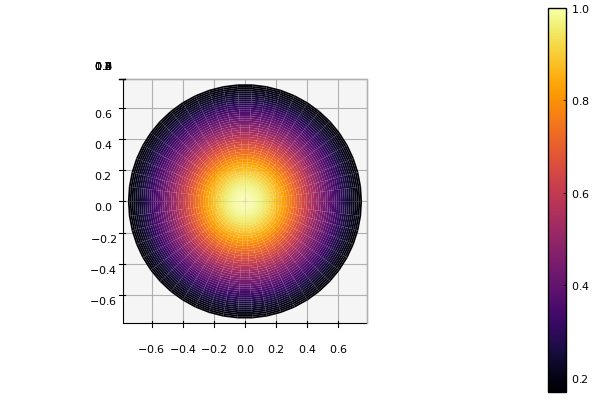

In [109]:
surface(xl,yl,reshape(abs.(einc)[:,1],(51,51)),camera=(0,90))

In [120]:
pos = 500*range(-1,1,length=61)
x,y = ndgrid(pos,pos);

In [121]:
farf = einc;
z=0.0
x,y=Matrix(x),Matrix(y);

In [122]:
z= z*ones(size(x))
k0 = lens.k0
k,n = lens.mat.k(k0), lens.mat.n(k0)

ϕ,θ = ndgrid(lens.ϕ,lens.θ)
ϕ,θ = ϕ[:],θ[:];

In [123]:
uϕ = [-sin.(ϕ) cos.(ϕ) 0*ϕ]
uρ = [cos.(ϕ) sin.(ϕ) 0*ϕ]
uθ = [cos.(ϕ).*cos.(θ) sin.(ϕ).*cos.(θ) -sin.(θ)];
fϕ = sum(conj.(uϕ) .*farf,dims=2 )
fρ = sum(conj.(uρ) .*farf,dims=2 )
farf = uϕ.*fϕ + uθ.*fρ;

In [124]:
vals = cart2pol.(x[:],y[:])

ϕ2,ρ2,z2 = first.(vals),last.(vals),z[:]
θ,ϕ = reshape(θ,(1,:)),reshape(ϕ,(1,:));

In [125]:
trans = exp.(-im*k*z2*cos.(θ)).*exp.(im*k*(ρ2*sin.(θ))).*cos.(ϕ2.-ϕ)
trans = (trans.*sin.(θ)).*sqrt.(cos.(θ));

In [126]:
dϕ = diff(lens.ϕ[[1,2]])[1]
dθ = diff(lens.θ[[1,2]])[1]

0.017018170289556975

In [127]:
e = trans*farf*dϕ*dθ
e = reshape(e,(size(x,1),size(x,2),3))
e =  im*k*sqrt(1/n)/(2π)*e;

In [128]:
ett = real.(sum(conj(e).*e,dims=3)[:,:,1]);

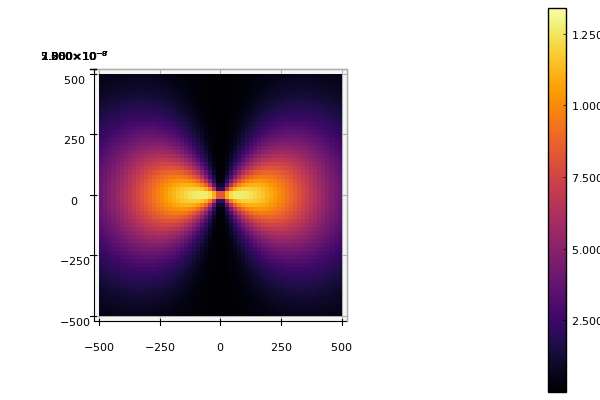

In [129]:
surface(x,y,ett,camera=(0,90))

In [131]:
? last

search: last lastindex findlast searchsortedlast logabsbeta clear_history



```
last(coll)
```

Get the last element of an ordered collection, if it can be computed in O(1) time. This is accomplished by calling [`lastindex`](@ref) to get the last index. Return the end point of an [`AbstractRange`](@ref) even if it is empty.

# Examples

```jldoctest
julia> last(1:2:10)
9

julia> last([1; 2; 3; 4])
4
```

---

```
last(itr, n::Integer)
```

Get the last `n` elements of the iterable collection `itr`, or fewer elements if `v` is not long enough.

!!! compat "Julia 1.6"
    This method requires at least Julia 1.6.


# Examples

```jldoctest
julia> last(["foo", "bar", "qux"], 2)
2-element Vector{String}:
 "bar"
 "qux"

julia> last(1:6, 10)
1:6

julia> last(Float64[], 1)
Float64[]
```

---

```
last(s::AbstractString, n::Integer)
```

Get a string consisting of the last `n` characters of `s`.

# Examples

```jldoctest
julia> last("∀ϵ≠0: ϵ²>0", 0)
""

julia> last("∀ϵ≠0: ϵ²>0", 1)
"0"

julia> last("∀ϵ≠0: ϵ²>0", 3)
"²>0"
```

---

```
last(q::Deque)
```

Returns the last element of the deque `q`.

---

```
last(D::CircularDeque)
```

Get the item from the back of the queue.

---

```
last(sc)
```

Argument `sc` is a SortedDict, SortedMultiDict or SortedSet. This function returns the last item (a `k=>v` pair for SortedDict and SortedMultiDict or a key for SortedSet) according to the sorted order in the container. Thus, `last(sc)` is equivalent to `deref((sc,lastindex(sc)))`. It is an error to call this function on an empty container. Time: O(log *n*)

---

```
last(sc)
```

Argument `sc` is a SortedDict, SortedMultiDict or SortedSet. This function returns the last item (a `k=>v` pair for SortedDict and SortedMultiDict or a key for SortedSet) according to the sorted order in the container. Thus, `last(sc)` is equivalent to `deref((sc,lastindex(sc)))`. It is an error to call this function on an empty container. Time: O(log *n*)

---

```
last(sc)
```

Argument `sc` is a SortedDict, SortedMultiDict or SortedSet. This function returns the last item (a `k=>v` pair for SortedDict and SortedMultiDict or a key for SortedSet) according to the sorted order in the container. Thus, `last(sc)` is equivalent to `deref((sc,lastindex(sc)))`. It is an error to call this function on an empty container. Time: O(log *n*)

---

```
last(cb::CircularBuffer)
```

Get the last element of CircularBuffer.
